## Parameter estimation of a Gaussian mixture model



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
import importlib
import clustering
import gmm
import distributions
importlib.reload(clustering)
importlib.reload(gmm)
importlib.reload(distributions)

from clustering import KMeansClustering
from gmm import GaussianMixtureModel
from distributions import Gaussian

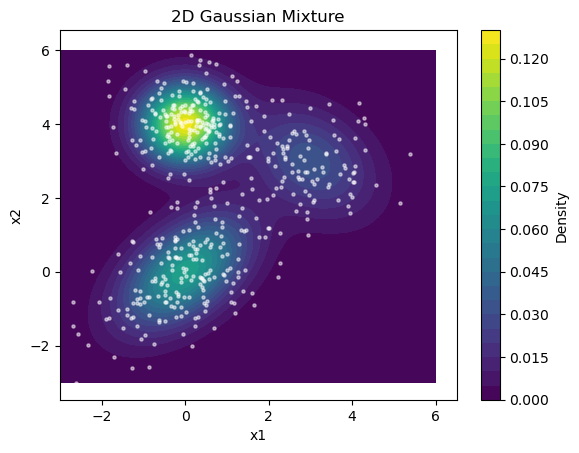

In [3]:
from scipy.stats import multivariate_normal

# Define parameters of the mixture
means = [np.array([0, 0]), np.array([3, 3]), np.array([0, 4])]
covs = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.3], [-0.3, 1]]), np.array([[0.5, 0], [0, 0.5]])]
weights = [0.4, 0.2, 0.4]

# Grid for evaluating densities
x, y = np.meshgrid(np.linspace(-3, 6, 200), np.linspace(-3, 6, 200))
pos = np.dstack((x, y))

# Mixture density
z = np.zeros(x.shape)
for w, mu, cov in zip(weights, means, covs):
    z += w * multivariate_normal(mean=mu, cov=cov).pdf(pos)

# Plot contour
plt.contourf(x, y, z, levels=30, cmap="viridis")
plt.colorbar(label="Density")

# sample points from mixture
samples = []
n_samples = 500
labels = []
for w, mu, cov, i in zip(weights, means, covs, [0,1,2]):
    n = int(w * n_samples)
    samples.append(np.random.multivariate_normal(mu, cov, n))
    labels += [i]*n
samples = np.vstack(samples)
plt.scatter(samples[:,0], samples[:,1], s=5, c="white", alpha=0.5)

plt.title("2D Gaussian Mixture")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
kmeans = KMeansClustering(k=3)
kmeans.fit(samples)

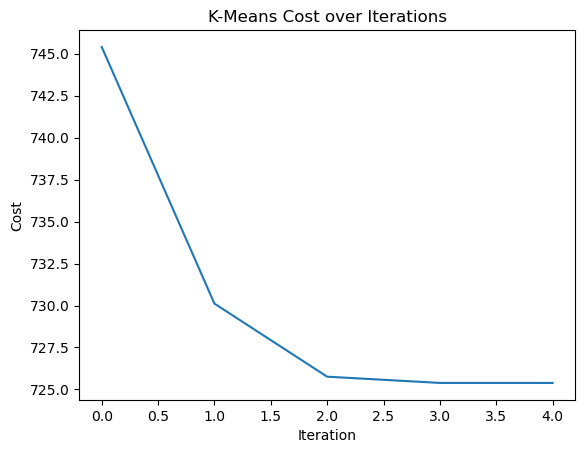

In [5]:
# Visualise the costs over iterations
kmeans.visualise_costs()

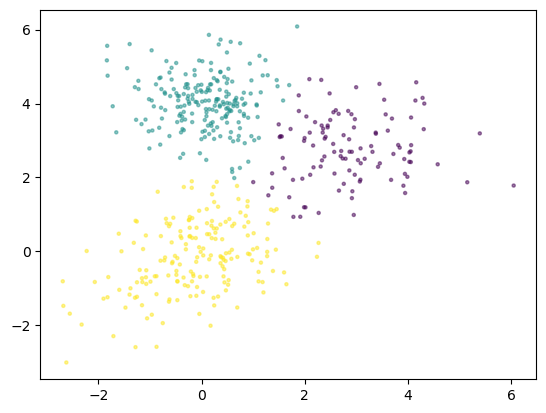

In [6]:
predicted_cluster = kmeans.predict(samples)
plt.scatter(samples[:,0], samples[:,1], c=predicted_cluster, s=5, cmap="viridis", alpha=0.5)

In [7]:
gm = GaussianMixtureModel(k=3)

In [8]:
gm.fitEM(samples)

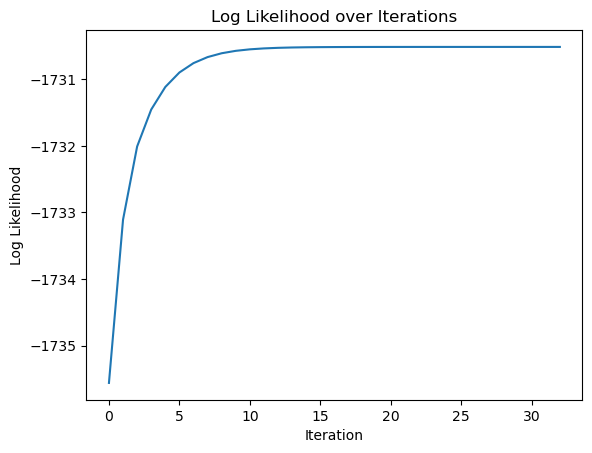

In [9]:
gm.visualize_log_likelihood()

In [10]:
gm.predictEM(samples)

array([[5.74932275e-01, 3.35010942e-01, 9.00567735e-02],
       [9.99996883e-01, 1.67739699e-08, 3.09849808e-06],
       [9.99999817e-01, 6.25583099e-24, 3.25580479e-20],
       ...,
       [7.85733908e-03, 9.70611989e-01, 2.15306704e-02],
       [2.42718892e-04, 9.88880961e-01, 1.08763191e-02],
       [4.46551574e-04, 9.99077087e-01, 4.76357146e-04]], shape=(500, 3))

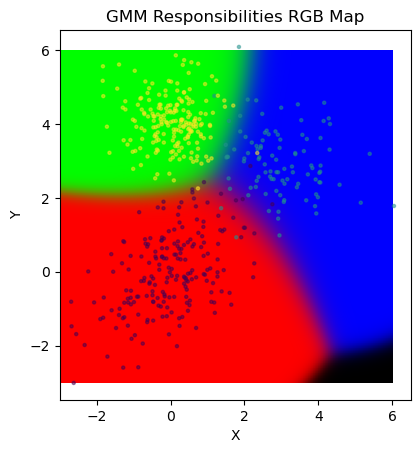

In [11]:
x, y = np.meshgrid(np.linspace(-3, 6, 200), np.linspace(-3, 6, 200))
pos = np.dstack((x, y))
pos_flat = pos.reshape(-1, 2)  

responsibilities = gm.predictEM(pos_flat)  
rgb_image = responsibilities.reshape(200, 200, 3) 

plt.imshow(rgb_image, origin='lower', extent=(-3, 6, -3, 6))
plt.scatter(samples[:,0], samples[:,1], c=labels, s=5, cmap="viridis", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("GMM Responsibilities RGB Map")
plt.show()

In [12]:
gm = GaussianMixtureModel(k=3)

In [13]:
gm.fitVI(samples)

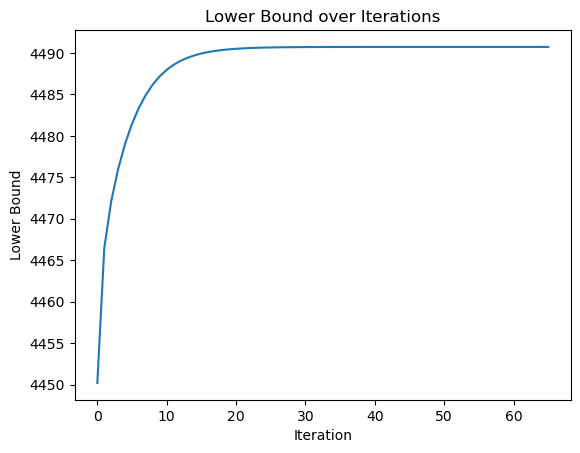

In [14]:
gm.visualize_lower_bound()

In [15]:
gm.predictVI(samples)

array([[5.76793212e-01, 8.43202281e-02, 3.38886560e-01],
       [9.99997269e-01, 2.71458314e-06, 1.60008261e-08],
       [1.00000000e+00, 1.92402899e-20, 5.64718243e-24],
       ...,
       [7.65200654e-03, 1.91561107e-02, 9.73191883e-01],
       [2.31605043e-04, 9.44338624e-03, 9.90325009e-01],
       [4.29070596e-04, 3.70514186e-04, 9.99200415e-01]], shape=(500, 3))

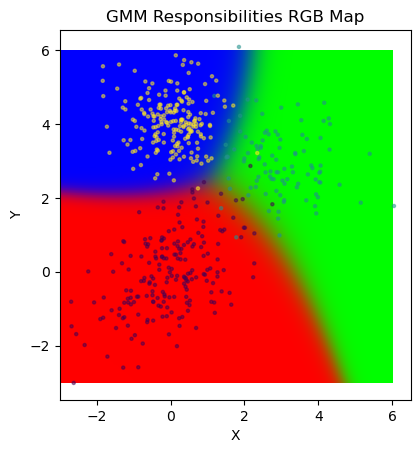

In [16]:
x, y = np.meshgrid(np.linspace(-3, 6, 200), np.linspace(-3, 6, 200))
pos = np.dstack((x, y))
pos_flat = pos.reshape(-1, 2)  

responsibilities = gm.predictVI(pos_flat)  
rgb_image = responsibilities.reshape(200, 200, 3) 

plt.imshow(rgb_image, origin='lower', extent=(-3, 6, -3, 6))
plt.scatter(samples[:,0], samples[:,1], c=labels, s=5, cmap="viridis", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("GMM Responsibilities RGB Map")
plt.show()